<a href="https://colab.research.google.com/github/raghavadevarajeurs/MachineLearning/blob/main/Assignment1/Machine_Learning_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [37]:
url="https://raw.githubusercontent.com/raghavadevarajeurs/MachineLearning/main/Data/united-states-gdp_new.csv"
file=requests.get(url).content
gdp_data=pd.read_csv(io.StringIO(file.decode('utf-8')),sep=',')

In [38]:
gdp_data.rename(columns={'GDP':'gdp'}, inplace=True)

In [39]:
gdp_data.describe()

,gdp,percapita
count,72.000000,72.000000
mean,23934.144486,21232.686715
std,24404.142750,18992.036213
min,998.462000,1719.223702
25%,2911.332250,3747.915454
50%,13955.651500,14966.072630
75%,41338.861750,36601.791682
max,82002.542000,62718.009410


In [40]:
url="https://raw.githubusercontent.com/raghavadevarajeurs/MachineLearning/main/Data/united-states-gdp-growth-rate.csv"
file=requests.get(url).content
gdp_growth_data=pd.read_csv(io.StringIO(file.decode('utf-8')),sep=',')

In [41]:
gdp_growth_data.describe()

,GDP_Growth_Percent,Growth_Annual_Change
count,59.000000,59.000000
mean,3.034549,-0.002373
std,2.047946,2.377443
min,-2.536800,-6.190000
25%,2.023600,-1.305000
50%,3.100000,0.030000
75%,4.423600,0.925000
max,7.236600,6.390000


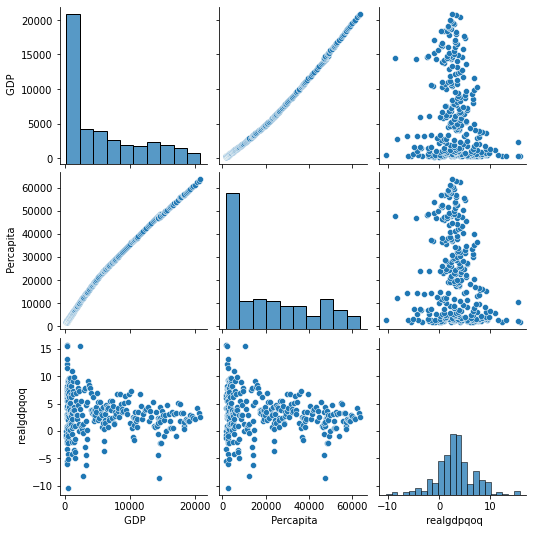

In [18]:
sns.pairplot(gdp_data)

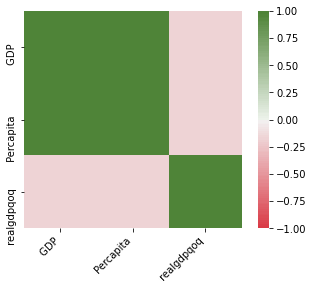

In [19]:
correlation = gdp_data.corr()
ax = sns.heatmap(
    correlation, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 120, n=100),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

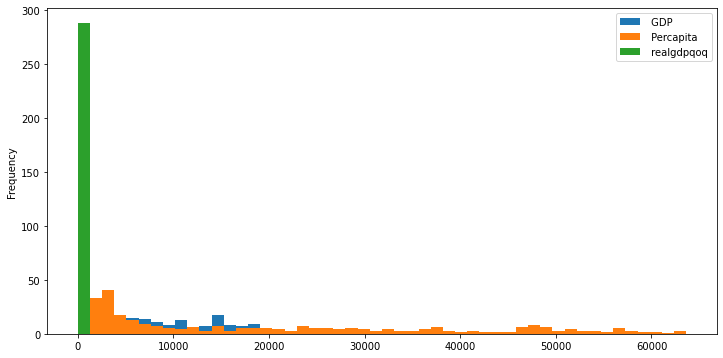

In [23]:
gdp_data.plot(kind='hist',bins=50,figsize=(12,6))

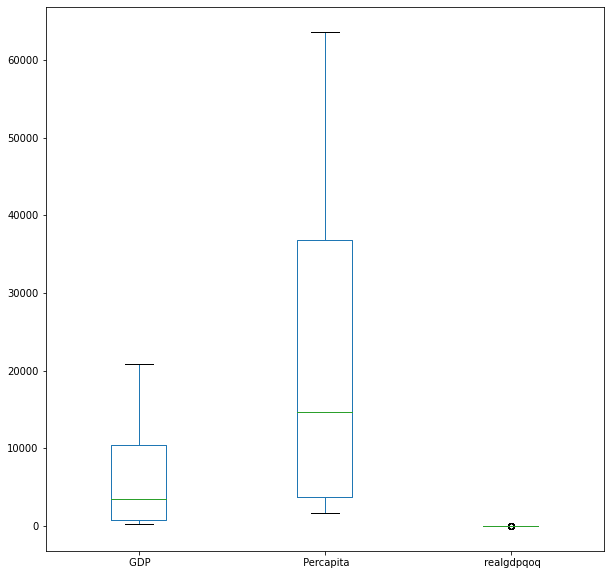

In [24]:
gdp_data.plot.box(figsize=(10,10))

In [27]:
gdp_data.iloc[:,[0,1,2,3]]

,date,GDP,Percapita,realgdpqoq
0,1947-03-01,243.164,1698.748804,0.00
1,1947-06-01,245.968,1710.605744,-1.07
2,1947-09-01,249.585,1727.841660,-0.83
3,1947-12-01,259.745,1789.838894,6.26
4,1948-03-01,265.742,1823.785765,6.02
...,...,...,...,...
283,2017-12-01,19831.829,60793.178181,2.27
284,2018-03-01,20041.047,61349.517862,2.20
285,2018-06-01,20411.924,62395.453906,4.10
286,2018-09-01,20658.204,63040.564912,3.31


In [34]:
from sklearn.mixture import GaussianMixture

Gausian Mixture Model 

In [35]:
gmm=GaussianMixture(n_components=2, covariance_type="spherical").fit(gdp_data)
labels = gmm.predict(gdp_data)

ValueError: ignored